In [17]:
import melspecx
from pathlib import Path
from IPython.display import Audio
AUDIO_PATH = Path("./data/suzannetrimmed.wav")
audio, sr = melspecx.read_wav(str(AUDIO_PATH), normalize=False, offset=0, duration=None)
Audio(audio, rate=sr)


create_mel_config execution time: 1.583µs
CubeCL WGPU device initialized
Using device type: WGPU
GPU device initialization time: 214.375µs
Frame computation time: 130.360291ms
GPU spectrogram total processing time: 1.381938916s
Average FFT time: 484.355µs
Total FFT operations: 2584
GPU spectrogram chunks count: 646
GPU spectrogram time: 1.381946125s
Total spectrogram function time: 1.383028625s
Spectrogram generation time: 1.383029625s



thread '<unnamed>' panicked at /Users/liampower/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/ndarray-0.16.1/src/linalg/impl_linalg.rs:298:5:
ndarray: inputs 2584 × 2048 and 1025 × 256 are not compatible for matrix multiplication
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: ndarray: inputs 2584 × 2048 and 1025 × 256 are not compatible for matrix multiplication

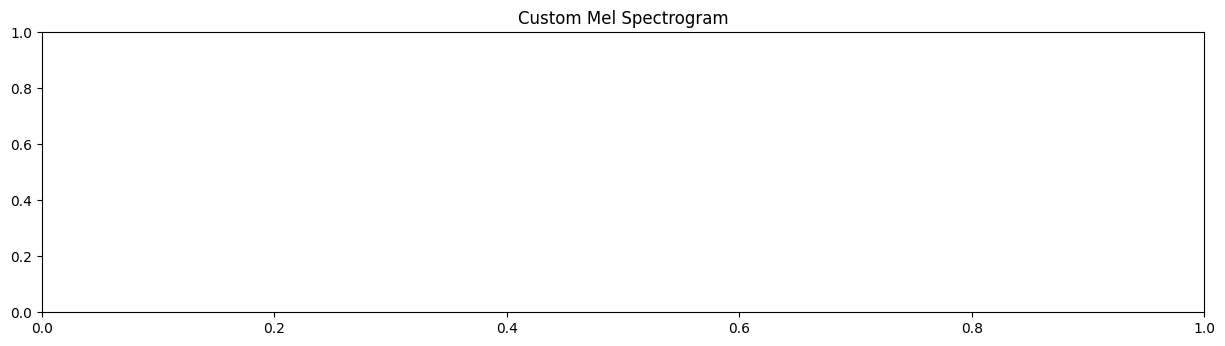

In [ ]:
from IPython.display import Image
from melspecx import create_mel_config
from dataclasses import dataclass
from time import time
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
import librosa

@dataclass
class MelConfig:
    sample_rate: float
    n_fft: int
    win_length: int
    hop_length: int
    f_min: float
    f_max: float
    n_mels: int
    top_db: float
    onesided: bool

# Create figure with two subplots
plt.figure(figsize=(15, 8))

# First subplot - Custom mel spectrogram
plt.subplot(2, 1, 1)
plt.title('Custom Mel Spectrogram')

# Optimized parameters for longer audio samples
config = create_mel_config(
    sample_rate=sr,
    n_fft=2048,
    win_length=1024,
    hop_length=512,
    f_min=0,
    f_max=sr/2,
    n_mels=256,
    top_db=80,
    onesided=True)

start = time()
config = MelConfig(**config)
mel_spec = melspecx.mel_spectrogram_db_py(config, audio)
mel_spec = np.array(mel_spec)
mel_spec = mel_spec.T

plt.axis('off')
spec = display.specshow(mel_spec, sr=sr, x_axis=None, y_axis=None, vmin=-config.top_db, vmax=0, fmax=8000, cmap='plasma')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

# Second subplot - Librosa default mel spectrogram
plt.subplot(2, 1, 2)
plt.title('Librosa Default Mel Spectrogram')

# Generate librosa mel spectrogram
librosa_mel = librosa.feature.melspectrogram(y=audio, sr=sr)
librosa_mel_db = librosa.power_to_db(librosa_mel, ref=np.max)

plt.axis('off')
librosa.display.specshow(librosa_mel_db, sr=sr, x_axis=None, y_axis=None, fmax=8000, cmap='plasma')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

plt.tight_layout()


create_mel_config execution time: 333ns
CubeCL WGPU device initialized
Using device type: WGPU
GPU device initialization time: 9.625µs
Frame computation time: 137.78625ms
GPU spectrogram total processing time: 1.215757583s
Average FFT time: 417.17µs
Total FFT operations: 2584
GPU spectrogram chunks count: 646
GPU spectrogram time: 1.215764125s
Total spectrogram function time: 1.216355916s
Spectrogram generation time: 1.216356542s
Mel filtering + dB conversion time: 75.062208ms
Mel spectrogram computation time: 1.291942791s
mel_spectrogram_db_py execution time: 1.291944208s
Generated mel spectrogram in 1.43 seconds
plot_mel_spec_py plotting time: 259.4035ms
plot_mel_spec_py encoding time: 690.805ms
plot_mel_spec_py total time: 950.217334ms


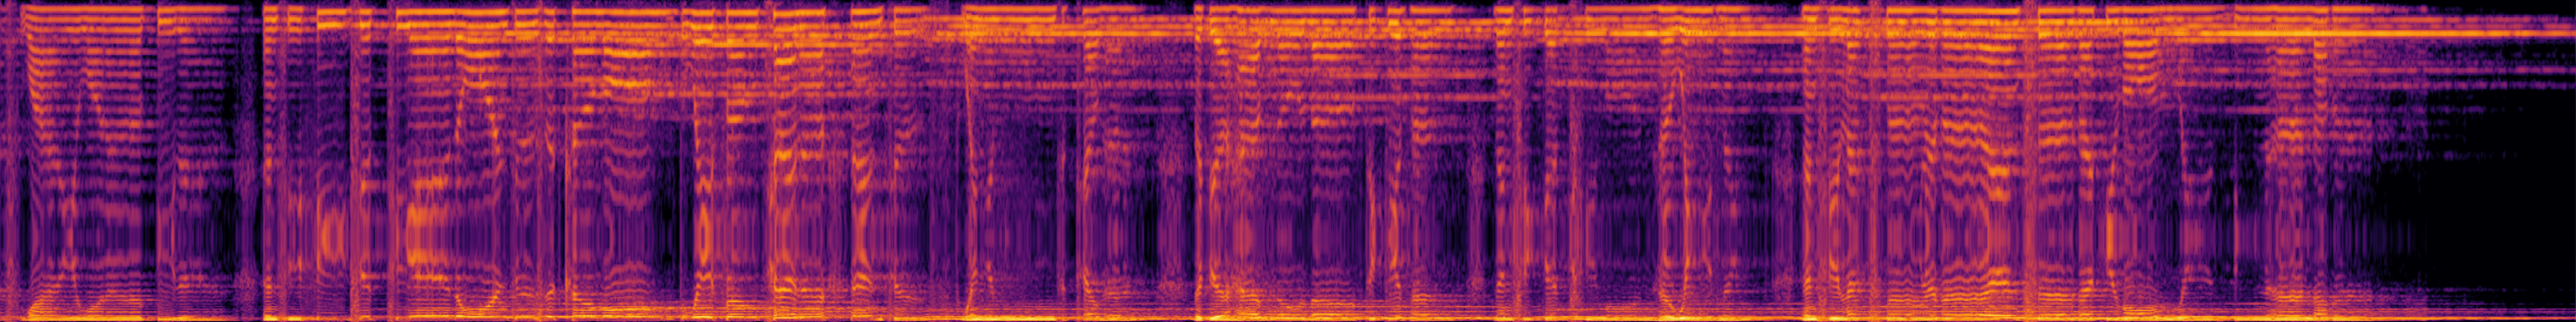

In [19]:
from IPython.display import Image
from melspecx import create_mel_config
from dataclasses import dataclass
from time import time

@dataclass
class MelConfig:
    sample_rate: float
    n_fft: int
    win_length: int
    hop_length: int
    f_min: float
    f_max: float
    n_mels: int
    top_db: float
    onesided: bool

# Optimized parameters for longer audio samples
config = create_mel_config(
    sample_rate=sr,
    n_fft=2048,        # Increased for better frequency resolution
    win_length=1024,   # Increased window size for better time-frequency tradeoff
    hop_length=512,    # Reduced hop length for smoother transitions
    f_min=20,          # Start from 20Hz to focus on audible frequencies
    f_max=sr/2,
    n_mels=256,        # Increased mel bands for better frequency detail
    top_db=80,
    onesided=True)

start = time()
config = MelConfig(**config)
mel_spec = melspecx.mel_spectrogram_db_py(config, audio)
print("Generated mel spectrogram in {:0.2f} seconds".format(time() - start))
image = melspecx.plot_mel_spec_py(mel_spec=mel_spec, cmap="inferno", width_px=4096, height_px=512)
Image(image)


Audio read time: 92.477417ms
CubeCL WGPU device initialized
Using device type: WGPU
GPU device initialization time: 2.291µs
Frame computation time: 69.496541ms
GPU spectrogram total processing time: 607.878375ms
Average FFT time: 416.7µs
Total FFT operations: 1292
GPU spectrogram chunks count: 646
GPU spectrogram time: 607.889458ms
Total spectrogram function time: 608.5475ms
Spectrogram generation time: 608.548333ms
Mel filtering + dB conversion time: 36.117958ms
Mel spectrogram computation time: 644.933541ms
Mel spectrogram generation time: 644.935541ms
Plotting time: 36.632334ms
Image encoding time: 94.529917ms


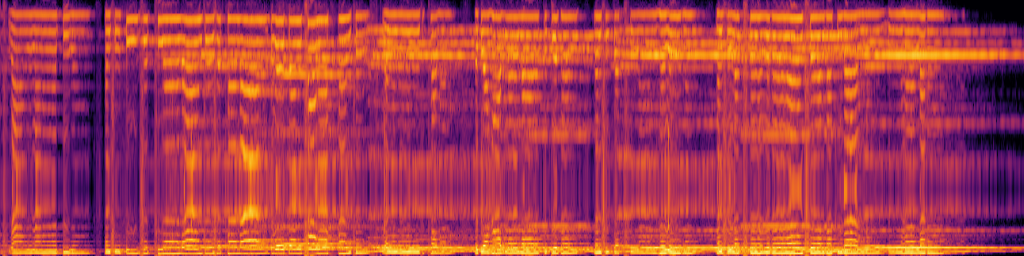

In [4]:
from IPython.display import Image
"""
 path: String,
    n_fft: usize,
    win_length: usize,
    hop_length: usize,
    f_min: f32,
    f_max: f32,
    n_mels: usize,
    colormap: String,
    width_px: u32,
    height_px: u32,
    top_db: f32,


"""

out = melspecx.mel_spec_from_path(str(AUDIO_PATH), 2048, 512, 1024, 0, sr/2, 128, "inferno", 1024, 256, 80)
Image(out)